<a href="https://colab.research.google.com/github/Tanishqa-10/NNDL-LAB/blob/main/Simple_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Autoencoder - Deep Learning**

## **Theory**

Autoencoders are a type of neural network that attempts to mimic its input as closely as possible to its output. It aims to take an input, transform it into a reduced representation called code or embedding.  Then, this code or embedding is transformed back into the original input. The code is also called the latent-space representation.

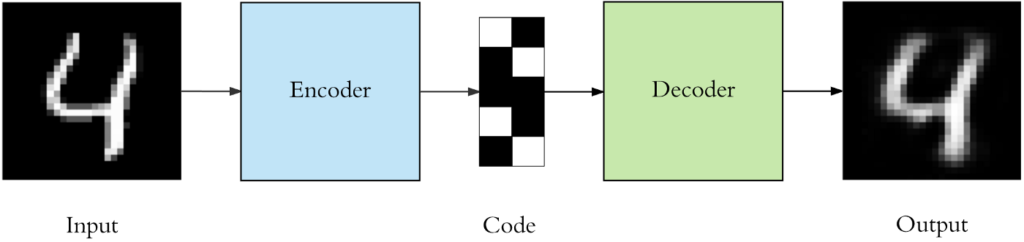

It is used to efficiently learn the data representation or representation space in an unsupervised manner. The main purpose is to learn a reduced representation of the input data.

Some of the important things to know about the autoencoders are:


*   Data-specific compression: Autoencoders compresses the data that is similar to what it had been trained on. An autoencoder trained on dog photos cannot compress human faces photos easily. 
*   Unsupervised: Training an autoencoder is easy as we don’t need labelled data. It is easily trained on any kind of input data.


*   Lossy in nature: There is always going to be some difference between the input and output of the autoencoder. The output will always have some missing information in it.

## **Implementation**

In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
print("")

In [3]:
## Seeding
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
## Loading the MNIST dataset and then normalizing the images.
#Autoencoder comes under unsupervised category so we dont provide y_test, y_train
dataset = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = dataset.load_data()
print(f"Original size: {x_train.shape} - {x_test.shape}")  
x_train, x_test = x_train / 255.0, x_test / 255.0

Original size: (60000, 28, 28) - (10000, 28, 28)


In [5]:
H = 28
W = 28
C = 1

In [9]:
## Flattening the images.
x_train = np.reshape(x_train, (-1, H * W * C))
x_test = np.reshape(x_test, (-1, H * W * C))
print(f"Flatten size: {x_train.shape} - {x_test.shape}")

Flatten size: (60000, 784) - (10000, 784)


In [19]:
## Expading the dimension of the images on the last axis.
## This will convert them from (?, 28, 28) to (?, 28, 28, 1)
# x_train = np.expand_dims(x_train, axis=-1)
# x_test = np.expand_dims(x_test, axis=-1)

In [7]:
## Latent space
latent_dim = 32

In [10]:
## Building the autoencoder
inputs = Input(shape=(H*W*C,))
h = Dense(latent_dim, activation="relu")(inputs)
outputs = Dense(H*W*C, activation="sigmoid")(h)

In [11]:
autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer=Adam(1e-3), loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [12]:
## Training the autoencoder
autoencoder.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=256,
    shuffle=False,
    validation_data=(x_test, x_test)
)

Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2867 - val_loss: 0.2032
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1834 - val_loss: 0.1670
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1568 - val_loss: 0.1473
Epoch 4/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1408 - val_loss: 0.1336
Epoch 5/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1292 - val_loss: 0.1235
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1210 - val_loss: 0.1163
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1150 - val_loss: 0.1111
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1106 - val_loss: 0.1073
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1070 - val_loss: 0.1046
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1042 - val_lo

In [13]:
test_pred_y = autoencoder.predict(x_test)


## **Output**

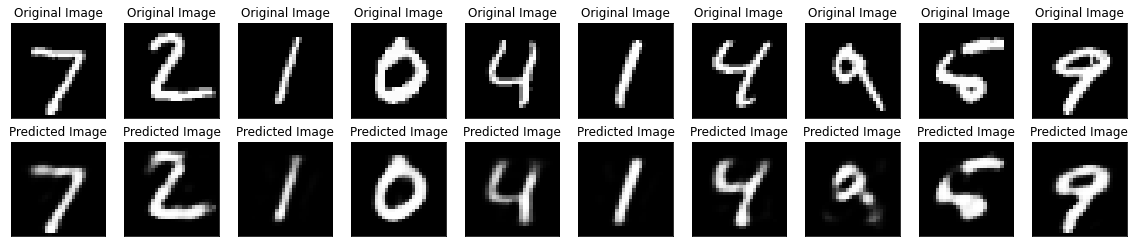

In [18]:
n = 10  ## how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ## display original
    ax = plt.subplot(2, n, i + 1)
    ax.set_title("Original Image")
    plt.imshow(x_test[i].reshape(H, W))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ## display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    ax.set_title("Predicted Image")
    plt.imshow(test_pred_y[i].reshape(H, W))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


## **Conclusion**: 

We have learned and inplementend simple autoencoder using Tenserflow. The feature learned by the autoencoder can be used for other tasks like image classification or text classification. It is also useful for dimensionality reduction or compression of the data which can be important in some applications.